<b>Census Income Data Set</b>


<b>Data Set Information:</b>

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

<b>Prediction task is to determine whether a person makes over 50K a year.</b>

<b>Attribute Information:</b>

Listing of attributes:

>50K, <=50K.

<b>age:</b> continuous.<br>
<b>workclass:</b> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
<b>fnlwgt:</b> continuous.<br>
<b>education:</b> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
<b>education-num:</b> continuous.<br>
<b>marital-status:</b> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
<b>occupation:</b> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
<b>relationship:</b> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
<b>race:</b> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
<b>sex:</b> Female, Male.<br>
<b>capital-gain:</b> continuous.<br>
<b>capital-loss:</b> continuous.<br>
<b>hours-per-week:</b> continuous.<br>
<b>native-country:</b> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

# New Section

Dataset: http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

# 1. Import all the necessary libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

In [0]:
train_data = pd.read_csv("adult.data",header=None)
train_data.columns= ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country","income"]
test_data1= pd.read_csv("adult.test",header=1)
test_data1.columns= ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country","income"]

In [5]:
train_data.shape

(32561, 15)

<b>Observation:</b>
<li>There are 32561 rows and 15 columns.</li>

In [6]:
train_data["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [7]:
income_map= {' <=50K':0, ' >50K':1}
train_data["income"]= train_data["income"].map(income_map).astype(int)
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


<b>Observation:</b>
<li>Map the entities <=50K:0 and >50K: 1.</li>

In [8]:
test_data1["income"].value_counts()

 <=50K.    12434
 >50K.      3846
Name: income, dtype: int64

In [9]:
income_map= {' <=50K.':0, ' >50K.':1}
test_data1["income"]= test_data1["income"].map(income_map).astype(int)
test_data1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


<b>Observation:</b>
<li>Map the entities <=50K.: 0 and >50K.: 1</li>

In [10]:
test_data1.shape

(16280, 15)

<b>Observation:</b>
<li>There are 16280 rows and 15 columns.</li>

In [11]:
# Combining two dataframes
data_1= pd.concat([train_data,test_data1])
data_1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [12]:
data_1.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0
16279,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,1


In [13]:
data_1.shape

(48841, 15)

<b>Observation:</b>
<li> There are 48841 rows and 15 columns after combining two dataframes into one.</li>

# Checking Missing Values

In [14]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
age               48841 non-null int64
workclass         48841 non-null object
fnlwgt            48841 non-null int64
education         48841 non-null object
education-num     48841 non-null int64
marital-status    48841 non-null object
occupation        48841 non-null object
relationship      48841 non-null object
race              48841 non-null object
sex               48841 non-null object
capital-gain      48841 non-null int64
capital-loss      48841 non-null int64
hours-per-week    48841 non-null int64
native-country    48841 non-null object
income            48841 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


<b>Observations:</b>
<li> There are 48841 samples in the dataframe.</li>
<li> There are both categorical and numerical columns in the dataset.</li>


In [15]:
data_1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<b>Observations:</b>
<li>There is no missing values.</li>

# Exploratory Data Analysis

In [16]:
data_1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [17]:
# Checking the ? in the attributes
data_1["workclass"].value_counts()

 Private             33905
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [18]:
data_1["occupation"].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3021
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [19]:
data_1["native-country"].value_counts()

 United-States                 43831
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

<b>Observation:</b>
<li>Three attributes i.e. workclass,occupation and native-country have empty value marked as "?"</li>

In [20]:
# Removing the ? from this attributes
print("Size of data before Removal of ?:", data_1.shape)
data_1["workclass"]= data_1["workclass"].replace(" ?", np.nan)
data_1["occupation"]= data_1["occupation"].replace(" ?", np.nan)
data_1["native-country"]= data_1["native-country"].replace(" ?", np.nan)
data_1.dropna(how="any",inplace=True)
print("Size of data after Removal of ?:",data_1.shape)

Size of data before Removal of ?: (48841, 15)
Size of data after Removal of ?: (45221, 15)


In [21]:
data_1["workclass"].value_counts().to_frame()

,workclass
Private,33306
Self-emp-not-inc,3796
Local-gov,3100
State-gov,1946
Self-emp-inc,1646
Federal-gov,1406
Without-pay,21


In [22]:
data_1["occupation"].value_counts().to_frame()

,occupation
Craft-repair,6020
Prof-specialty,6008
Exec-managerial,5984
Adm-clerical,5540
Sales,5408
Other-service,4808
Machine-op-inspct,2969
Transport-moving,2316
Handlers-cleaners,2046
Farming-fishing,1480


In [23]:
data_1["native-country"].value_counts().to_frame()

,native-country
United-States,41291
Mexico,903
Philippines,283
Germany,193
Puerto-Rico,175
Canada,163
India,147
El-Salvador,147
Cuba,133
England,119


<b>Observation:</b>
<li>From the three atrributes i.e. workclass, occupation, native-country, "?" is removed.</li>

<h2>Univariate Analysis</h2>

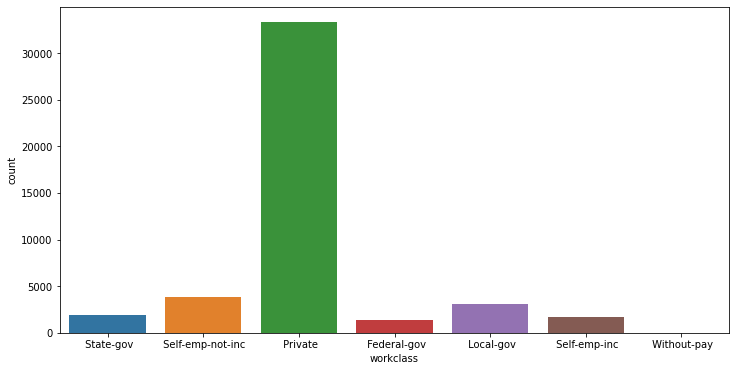

In [0]:
ax1=(12,6)
fig, ax= plt.subplots(figsize=ax1,ncols=1)
sns.countplot(x="workclass",data=data_1)
plt.show()

<b>Observation:</b>
<li>Most of the people work in private firms.</li>

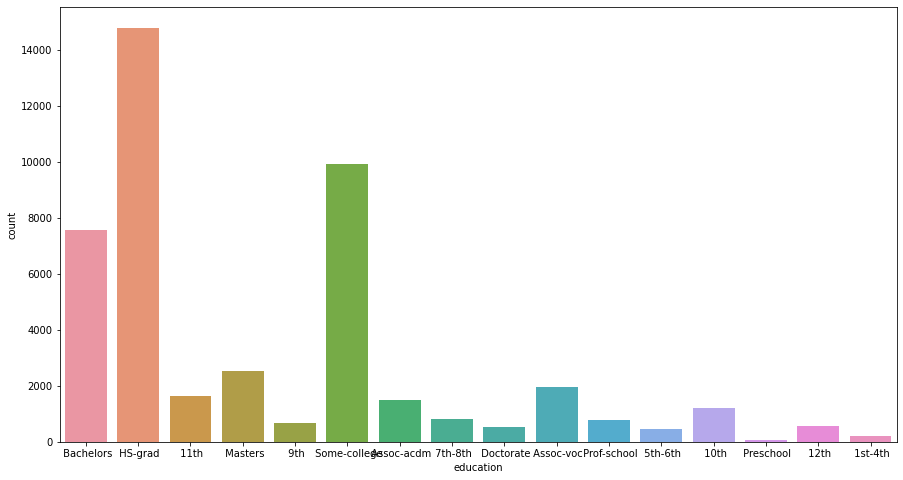

In [0]:
ax2=(15,8)
fig, ax= plt.subplots(figsize=ax2,ncols=1)
sns.countplot(x="education",data=data_1)
plt.show()

<b>Observation:</b>
<li>Most of the people have done HS-Graduate and some are in college and some have done Bachelors.</li>

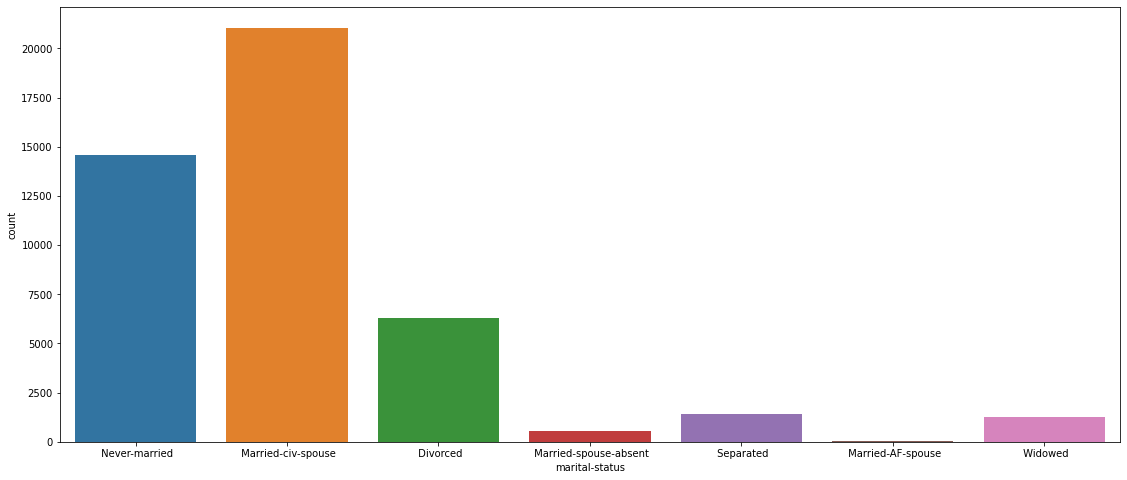

In [0]:
ax3=(19,8)
fig, ax= plt.subplots(figsize=ax3,ncols=1)
sns.countplot(x="marital-status",data=data_1)
plt.show()

<b>Observation:</b>
<li>Most of the people are married.</li>

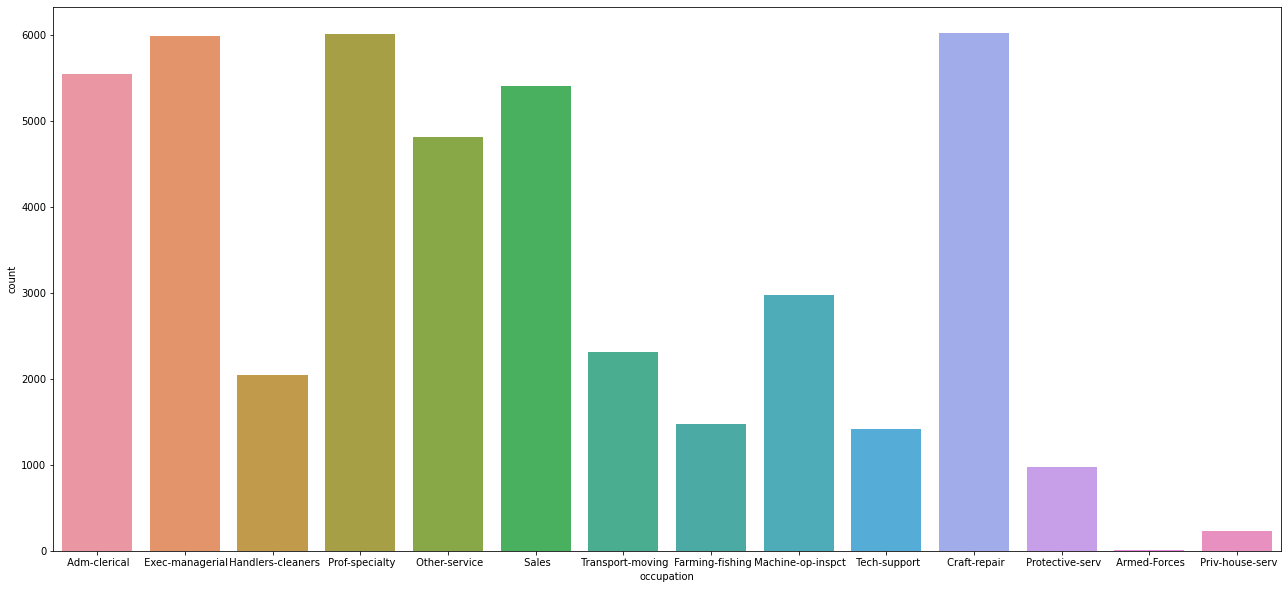

In [0]:
ax4=(22,10)
fig, ax= plt.subplots(figsize=ax4,ncols=1)
sns.countplot(x="occupation",data=data_1)
plt.show()

<b>Observation:</b>
<li>Most of the people have occupation of Exec-managerial, Prof-speciality and craft-repair.</li>

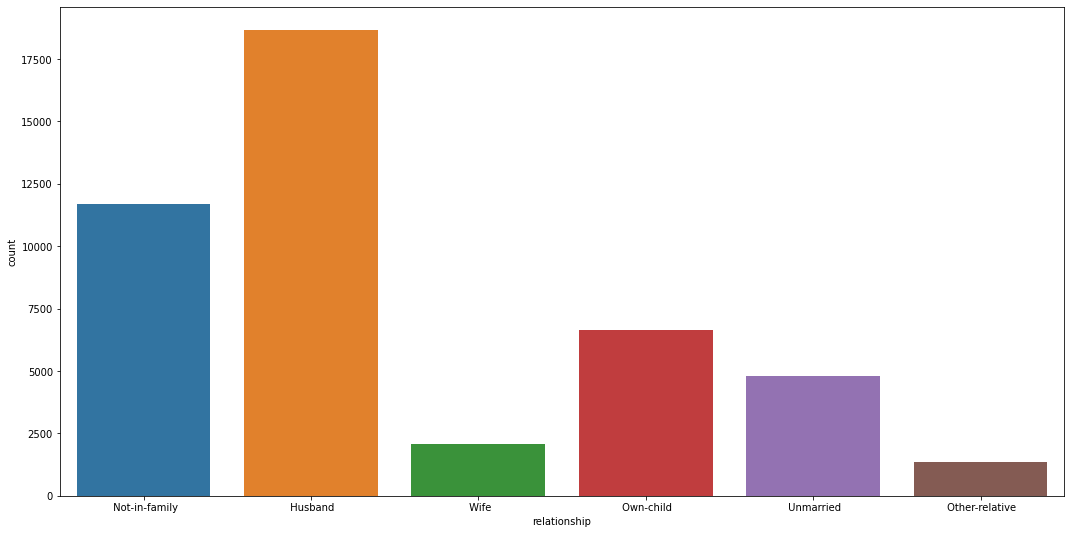

In [0]:
ax5=(18,9)
fig, ax= plt.subplots(figsize=ax5,ncols=1)
sns.countplot(x="relationship",data=data_1)
plt.show()

<b>Observation:</b>
<li> Most of the people are married and they are Husband</li>

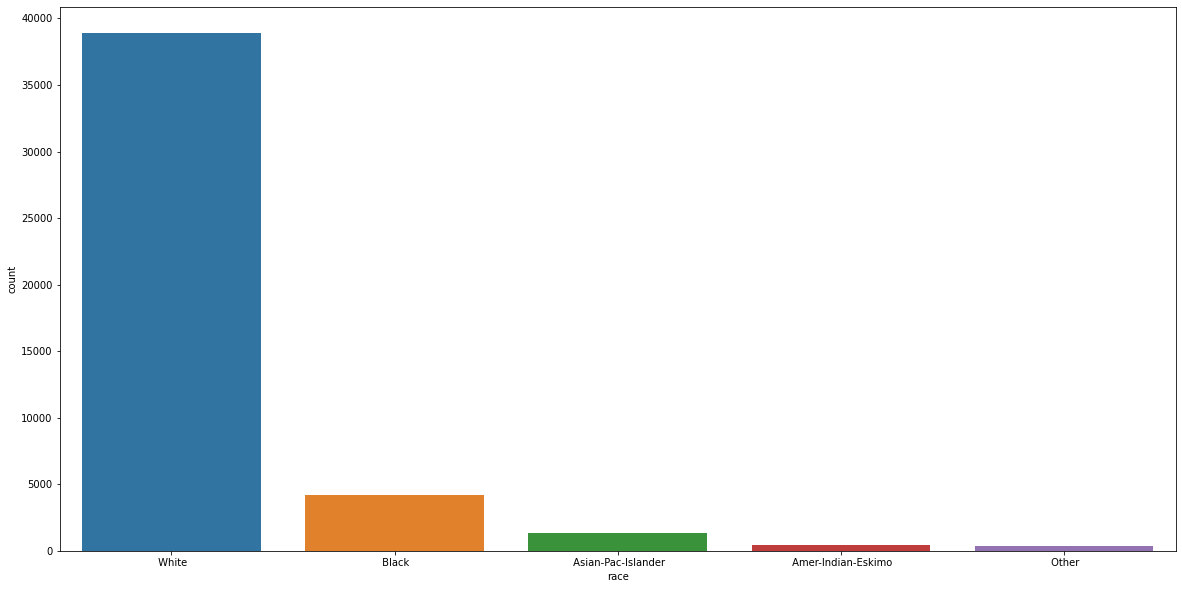

In [0]:
ax6=(20,10)
fig, ax= plt.subplots(figsize=ax6,ncols=1)
sns.countplot(x="race",data=data_1)
plt.show()

<b>observation:</b>
<li>From the above visualization, it is cleart that Most of the People are white.</li>

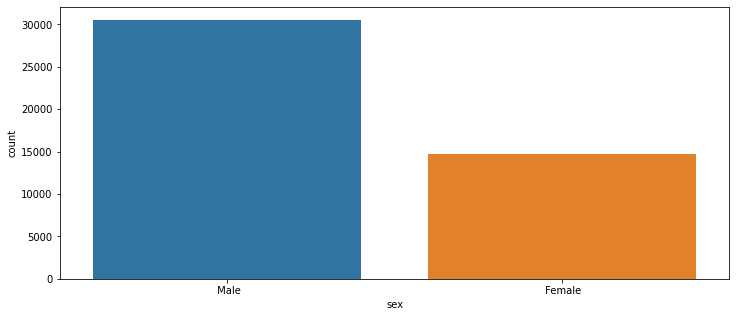

In [0]:
ax7=(12,5)
fig, ax= plt.subplots(figsize=ax7,ncols=1)
sns.countplot(x="sex",data=data_1)
plt.show()

<b>Observation:</b>
<li> There are more people who are Male.</li>

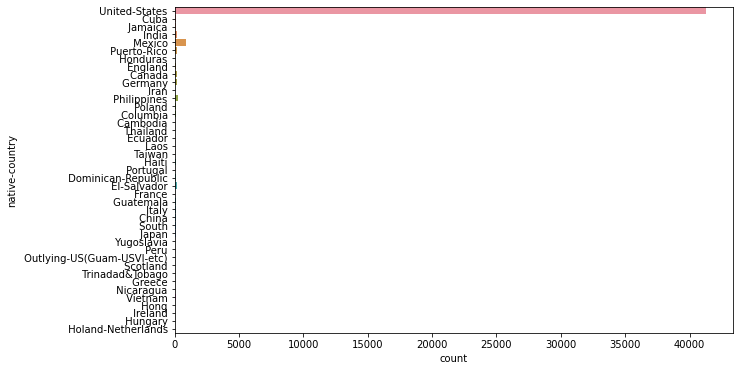

In [0]:
ax8=(10,6)
fig, ax= plt.subplots(figsize=ax8,ncols=1)
sns.countplot(y="native-country",data=data_1)
plt.show()

<b>Observation:</b>
<li> From the visualization, Most of the people have United States as their native country and some people have Mexico.</li>

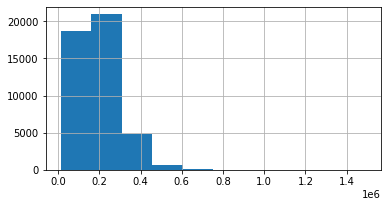

In [0]:
# Distribution of data
data_1["fnlwgt"].hist(figsize=(6,3))
plt.show()

<b>Observation:</b>
<li> From the above histogram, the distribution of fnlwgt seems to be right skewed.</li>

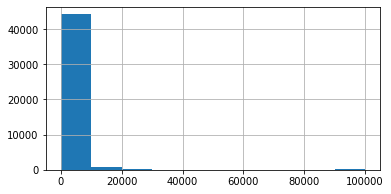

In [0]:
data_1["capital-gain"].hist(figsize=(6,3))
plt.show()

<b>Observation:</b>
<li> From the above visualization, most of the values of the "capital-gain" are centered to 0 to 20k and few on 99k that means person has no gain or has gain of large amount(10k).</li>

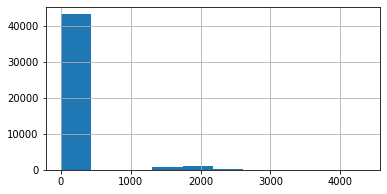

In [0]:
data_1["capital-loss"].hist(figsize=(6,3))
plt.show()

In [0]:
data_1[data_1["capital-loss"]>0].shape

(2140, 15)

<b>Observation:</b>
<li> From the above visualization, Most of the "capital-loss" values are centered to 0 and only few values are at (2140).

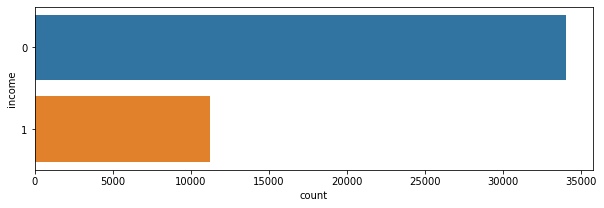

In [0]:
figure=plt.figure(figsize=(10,3))
sns.countplot(y="income", data=data_1)
plt.show()

<b>Observation:</b>
<li>From the above visualization, we can conclude that most of the people belong to income group 0(who earns less than 50K) and some people belong to income group 1(who earns more than 50K).</li>

<h2>Bivariate Analysis</h2>

Relationship between Capital Gain and Capital Loss

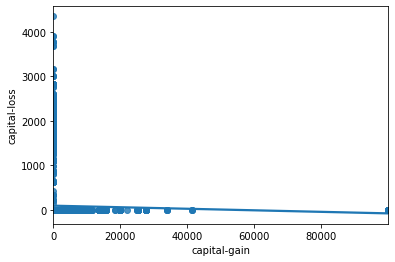

In [0]:
import warnings
warnings.filterwarnings("ignore")
sns.regplot("capital-gain","capital-loss",data=data_1)
plt.xlabel("capital-gain")
plt.ylabel("capital-loss")
plt.show()

<b>Observation:</b>
<li> From the above plot, both capital gain and capital loss lie on zero.</li>
<li> If capital gain is zero there is possibility of capital loss being high or zero.</li>
<li>If capital loss is zero there is possibility of capital gain being high or zero.</li>

<b>Relationship of Age with income</b>

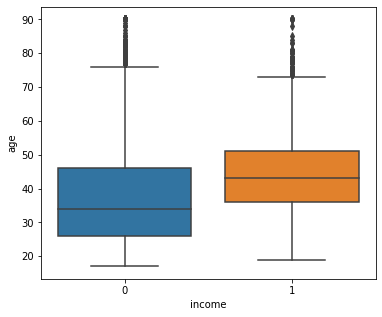

In [0]:
figure= plt.figure(figsize=(6,5))
sns.boxplot(x="income",y="age", data=data_1)
plt.show()

<b>Observation:</b>
<li>Outliers present in both income group(<=50K:0 and >50K:1) with respect to "age" attribute.</li>
<li> Income group (<=50K:0) has median "age"(38 years) and Income group(>50K) has median "age" (45 years).</li>

<b> Relationship of Workclass with income.</b>

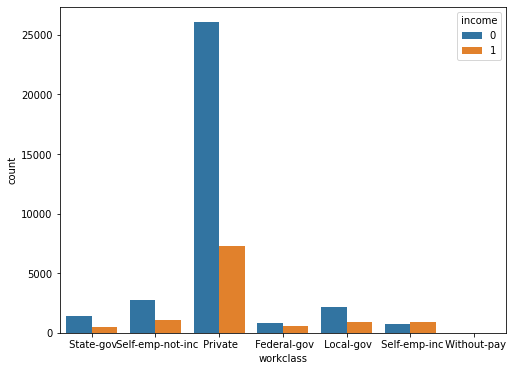

In [0]:
plt.figure(figsize=(8,6))
sns.countplot(x="workclass", hue="income",data=data_1)
plt.show()

<b>Observation:</b>
<li> In Private workclass most of the people belong to income group 1(<=50K)</li>

<b>Relationship between fnlwgt and income.</b>

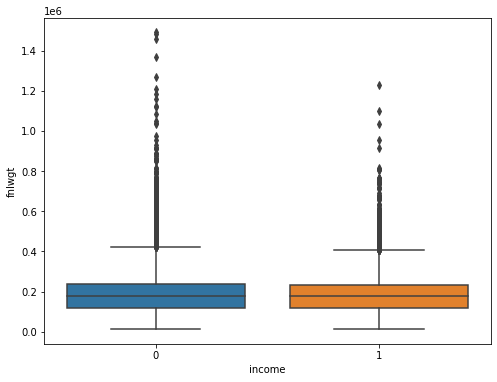

In [0]:
plt.figure(figsize=(8,6))
sns.boxplot(x="income",y="fnlwgt",data=data_1)
plt.show()

<b>Observation:</b>
<li>Outliers are present in both the income groups.</li>
<li>Boxplot for final weight with respect to income is similar except the outlier in income group 0(<=50K)is more.</li>

<b>Relationship between education and income.</b>

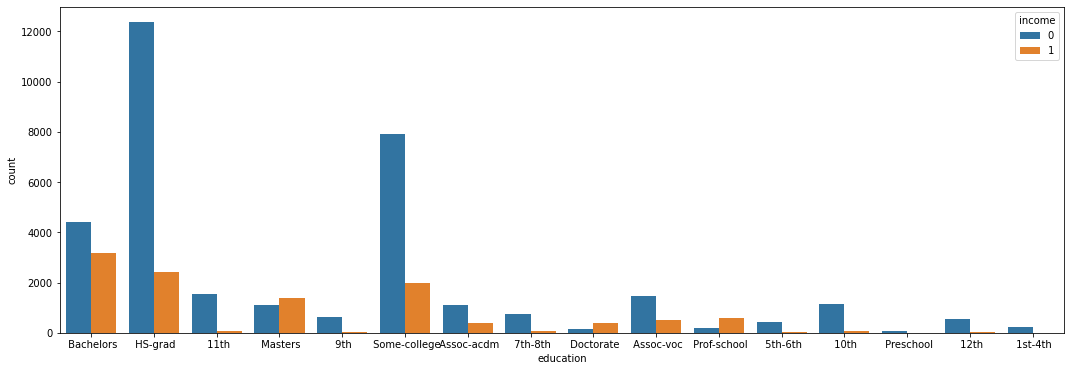

In [0]:
plt.figure(figsize=(18,6))
sns.countplot(x="education", hue="income",data=data_1)
plt.show()

<b>Observations:</b>
<li> From the above plot, most of the people of income group 0(<=50K) fall under HS_grad and some people in some college.</li>
<li> There are only few categories in "education" attributes who are greater than income group 0 i.e. masters, prof-school.</li>

<b>Relationship between marital-status and income.</b>

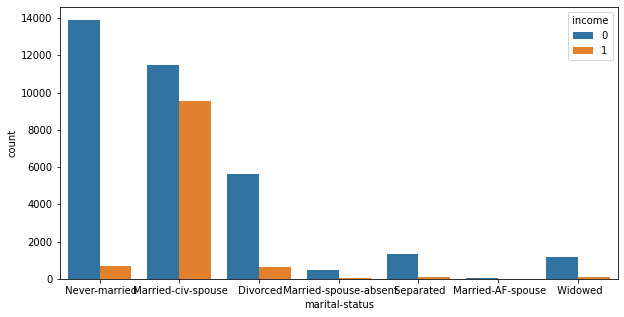

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(x="marital-status", hue="income",data=data_1)
plt.show()

<b>Observation:</b>
<li> From the above plot, we can conclude that people with income less than (<=50K) fall under Never-married category.</li>

<b>Relationship between occupation and income.</b>

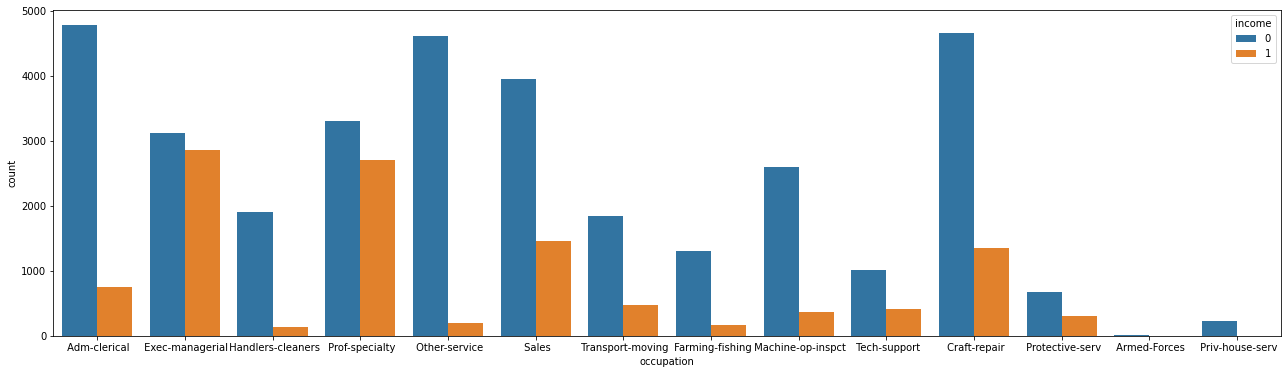

In [0]:
plt.figure(figsize=(22,6))
sns.countplot(x="occupation", hue="income",data=data_1)
plt.show()

<b>Observation:</b>
<li> Adm-clerical and craft-repair has maximum percentage that fall in income group 0(<=50K) and prof-speciality and Exec-managerial fall in income group 1 (>50K).</li>

<b>Plot between relationship and income</b>

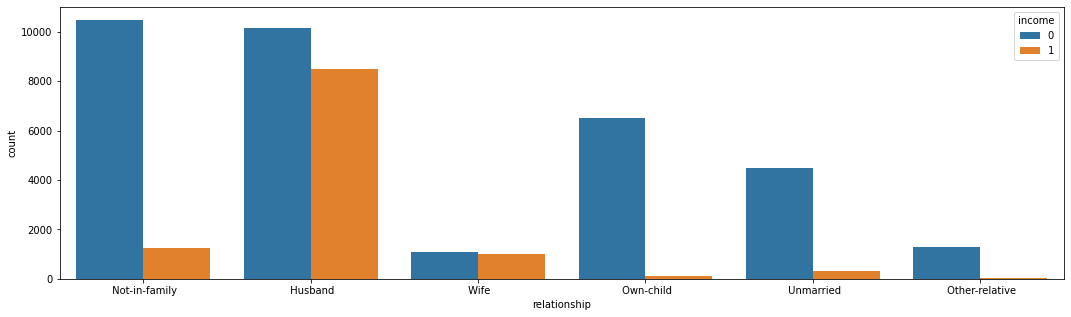

In [0]:
plt.figure(figsize=(18,5))
sns.countplot(x="relationship", hue="income",data=data_1)
plt.show()

<b>Observation:</b>
<li> People who earn less than (<=50K) group 0 fall under Not-in-family category and people who have income (>50K) group 1 fall under Husband as their relationship.</li>

<b>Relationship between race and income.</b>

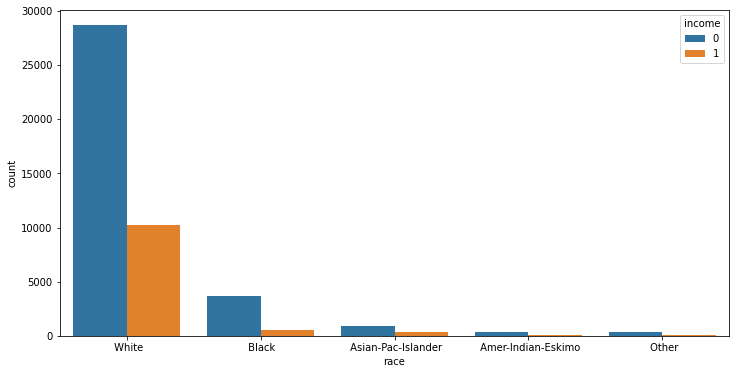

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(x="race", hue="income",data=data_1)
plt.show()

<b>Observation:</b>
<li> The "white" race of income group 0(<=50K) is greater than income group 1(>50K).</li>

<b>Relationship between sex and income.</b>

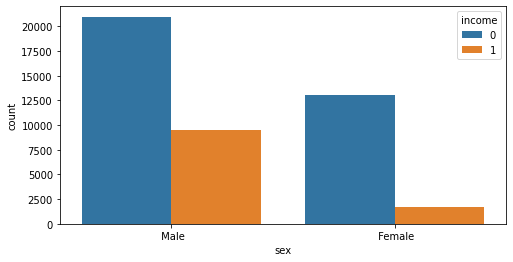

In [0]:
plt.figure(figsize=(8,4))
sns.countplot(x="sex", hue="income",data=data_1)
plt.show()

<b>Observation:</b>
<li> Based on the result, out of (<=50K) and (>50K) Male of income group 0(<=50K) is greater.</li>
<li> out of (<=50K) and (>50K) Female of income group 0(<=50K) is greater.</li>

<b>Relationship between capital-gain and income</b>

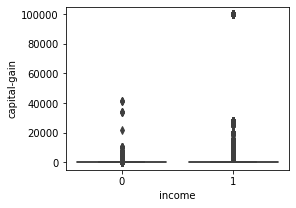

In [0]:
plt.figure(figsize=(4,3))
sns.boxplot(x="income",y="capital-gain",data=data_1)
plt.show()

<b>Observation:</b>
<li> Most of the capital gain value is accumulated at income group 0(<=50K).</li>

<b>Relationship between capital-loss and income.</b>

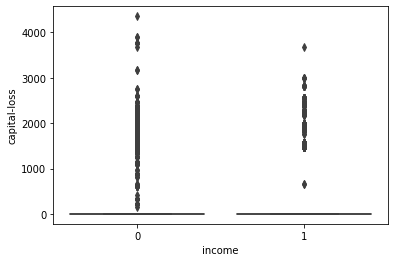

In [0]:
plt.figure(figsize=(6,4))
sns.boxplot(x="income",y="capital-loss",data=data_1)
plt.show()

<b>Observation:</b>
<li> Both the boxplot is similar and most of the values are concentrated on 0.</li>

<b>Relationship between hours-per-week and income</b>

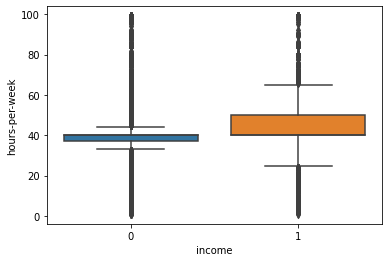

In [0]:
plt.figure(figsize=(6,4))
sns.boxplot(x="income",y="hours-per-week",data=data_1)
plt.show()

<b>Observation:</b>
<li> The median "hours-per-week" for income group 1 who earns (>50K) is greater than the income group 0(<=50K).</li>
<li> Income group who earns (>50K) has spend ~44 hours-per-week.</li>
<li> Income group who earns (<=50K) has spend ~38 hours-per-week.</li>
<li> Income group 1 who earns(>50K) have flexible working hours.</li>


<b>Relationship between native-country and income.</b>

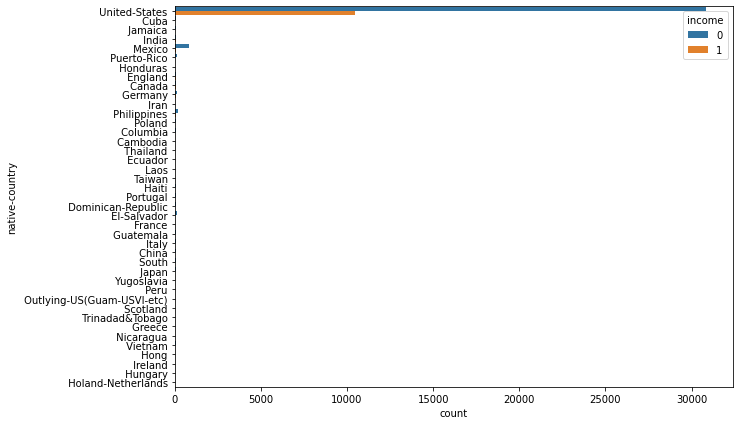

In [0]:
plt.figure(figsize=(10,7))
sns.countplot(y="native-country", hue="income",data=data_1)
plt.show()

<b>Observation:</b>
<li> Most of the people who earns income group 0(<=50K) have United-States has their native-country.</li>

<b>Relationship between education-num and income.</b>

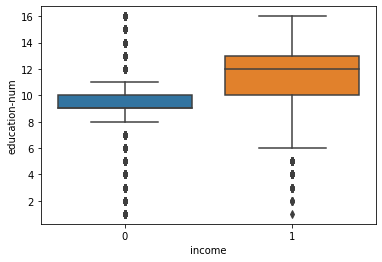

In [0]:
plt.figure(figsize=(6,4))
sns.boxplot(x="income",y="education-num",data=data_1)
plt.show()

<b>Observation:</b>
<li> The median of income group 1(>50K) is 12 and more outliers are present in income group 0(<=50K).</li>

# Summary statistics for numeric attributes.

In [0]:
data_1_num= data_1.drop(["education-num", "income"],axis=1)

In [0]:
data_1_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45221.000000,4.522100e+04,45221.000000,45221.000000,45221.000000
mean,38.548241,1.897339e+05,1101.454700,88.597377,40.938038
std,13.217863,1.056402e+05,7506.511295,404.960355,12.007640
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173870e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783130e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379280e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


<b>Observations:</b>
<li> The mean of age is 38. Age varies from 17 to 90.</li>
<li> fnlwgt seems to be right skewed.</li>
<li> The mean of capital-gain is 1101.45 and median is 0.</li>
<li> The mean of capital-loss is 88 but median is 0.</li>
<li> In this attribute, hours-per-week varies within the range of 1 to 99.</li>

# Summary statistics of categorical attributes.

In [0]:
data_1.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,45221,45221,45221,45221,45221,45221,45221,45221
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33306,14783,21055,6020,18666,38903,30526,41291


<b>Observations:</b>
<li>native-country has maximum number of unique categories i.e 41 and it is highly biased towards United-States. </li>
<li>race is also biased to the white race category.</li>
<li>The top category in workclass is Private.</li>

# Correlation among the numeric attributes.

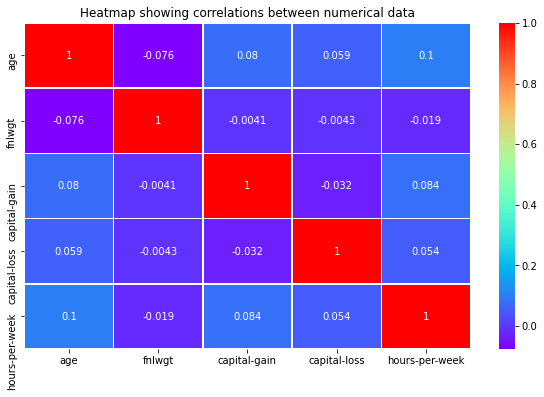

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(data_1_num.corr(),annot=True, linewidths=.5, cmap="rainbow")
plt.title("Heatmap showing correlations between numerical data")
plt.show()

<b>Observations:</b>
<li> There is no strong correlation between the numeric attributes.</li>
<li> The strongest correlation is present between age and hours-per-week with coefficient of 1.0.</li>

<b>Pair-Plot</b>

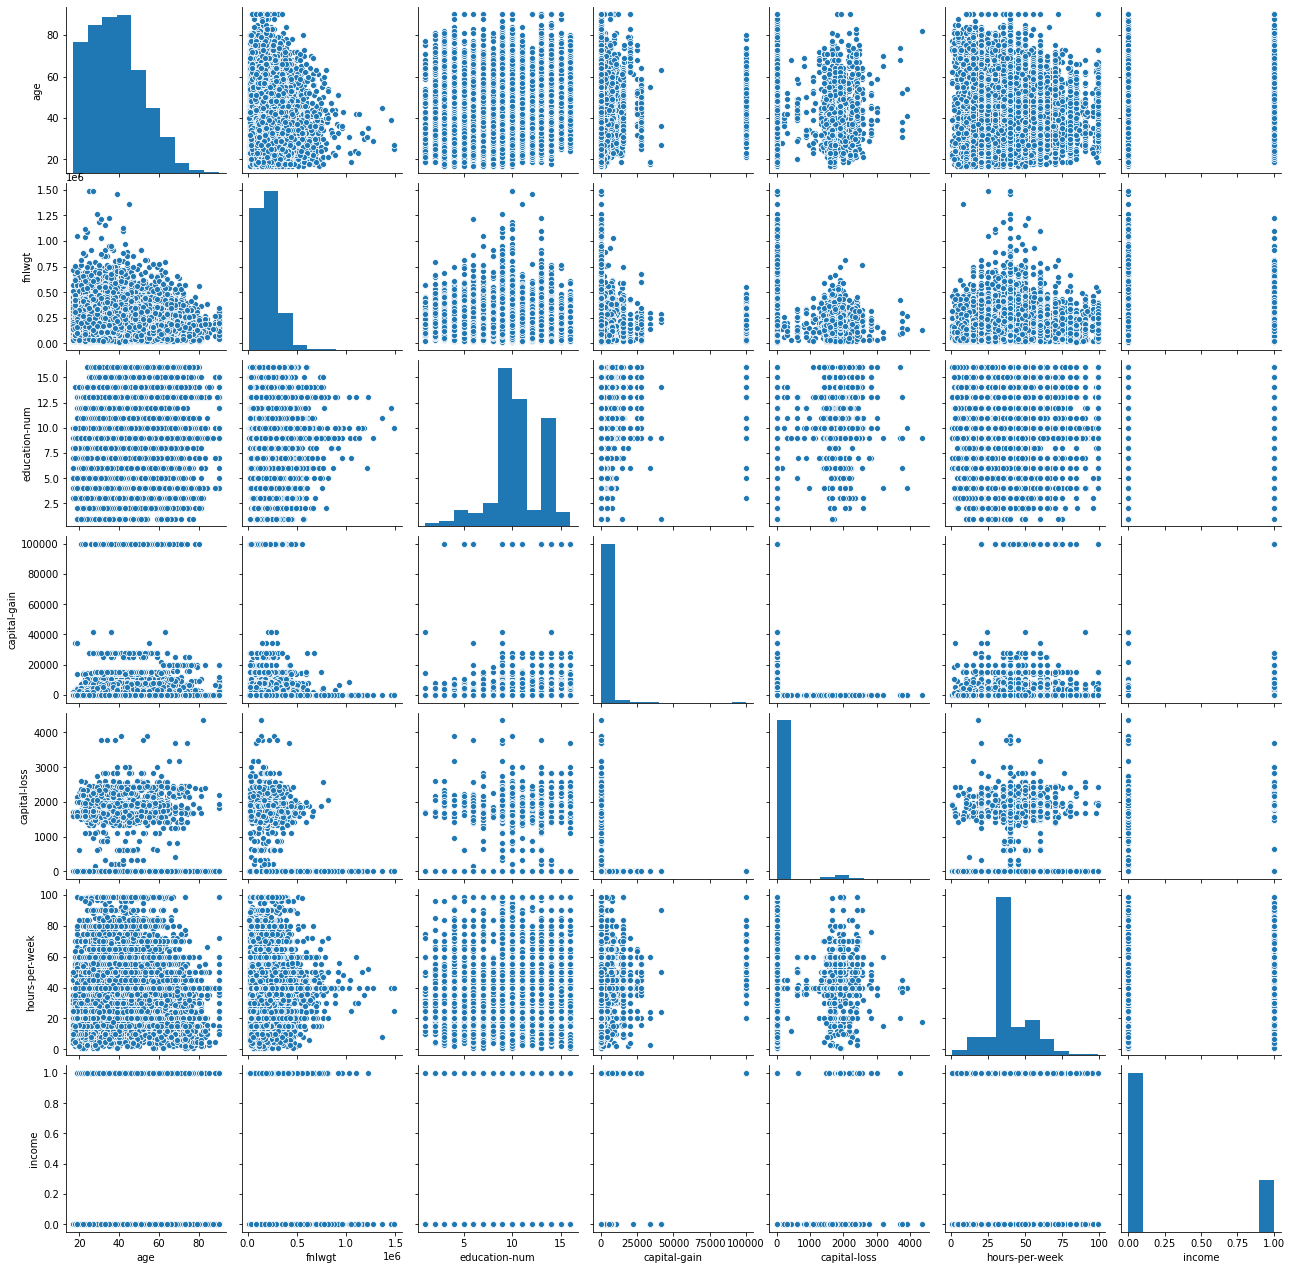

In [0]:
sns.pairplot(data_1)

# Multivariate Analysis

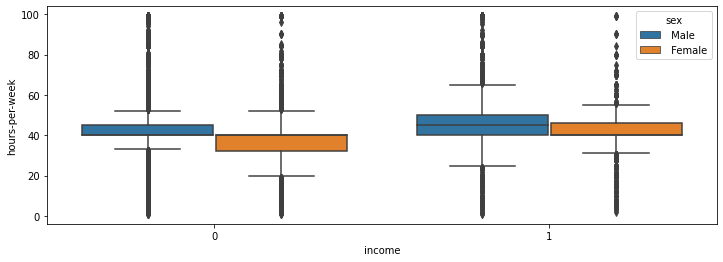

In [0]:
plt.figure(figsize=(12,4))
sns.boxplot(x="income",y="hours-per-week",hue="sex",data=data_1)
plt.show()

<b>Observation:</b>
<li> The median "hours-per-week" for females is lower than the males in the income group 0 (<=50K).</li>

<b> Preprocess the data to train any ML Model.</b>

Some of the attributes are categorical, so to prepare the data to train we have to convert them into numeric form. We are using labelencoder to convert them.

<b>Checking Skewness</b>

In [24]:
data_1.skew(axis=0)

age                0.532784
fnlwgt             1.447528
education-num     -0.310674
capital-gain      11.788871
capital-loss       4.516247
hours-per-week     0.340536
income             1.168041
dtype: float64

In [0]:
# Treating the skewness in the dataset
for index in data_1.skew().index:
    if data_1.skew().loc[index]>0.5:
        data_1[index]=np.log1p(data_1[index])

In [26]:
data_1.skew(axis=0)

age              -0.138811
fnlwgt           -0.832962
education-num    -0.310674
capital-gain      3.082342
capital-loss      4.271140
hours-per-week    0.340536
income            1.168041
dtype: float64

In [0]:
# We are using LabelEncoder
from sklearn.preprocessing import LabelEncoder
data_1= data_1.apply(LabelEncoder().fit_transform)

<b>Checking Outliers in the dataset.</b>

In [28]:
from scipy.stats import zscore
z_score=abs(zscore(data_1))
print("The shape of dataset before removing outliers",data_1.shape)
data_1=data_1.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",data_1.shape)

The shape of dataset before removing outliers (45221, 15)
The shape of dataset after removing outliers (37701, 15)


<b>Split the data into train and test set</b>

we are using income as a target variable and rest as dependent variables.

In [0]:
from sklearn.model_selection import train_test_split

X=data_1.drop(["income"],axis=1)
y=data_1["income"]

In [0]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the data into train and test(70:30) ratio</b>

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [0]:
# We will use auc_roc score as the metrics 
def auc_roc_score(models,X,y):
    auc_roc_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        models.fit(X_train,y_train)
        y_pred= models.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>auc_roc_score:
            auc_roc_score=auc_roc
            ac_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",ac_score," and it is :",round((auc_roc_score),2))

# Machine Learning Models

We will use 4 classification algorithms i.e. Logistic Regression, KNN(K-Nearest Neighbor) and SVM(Support Vector Machine), Gradient boosting, XG Boost Classifier.

<b>Logistic Regression:</b>

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# Logistic Regression
log=LogisticRegression()
param= {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
log=GridSearchCV(log,param,cv=10)
log.fit(X,y)
log.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [53]:
log=LogisticRegression(C=0.1,penalty='l2')
auc_roc_score(log,X,y)

Maximum AUC_ROC Score corresponding to: 62  and it is : 0.63


In [54]:
y_predict = log.predict(X_test)
score_log= log.score(X_test, y_test)
print("The accuracy of the Logistic Regresion is", round((score_log),3))

The accuracy of the Logistic Regresion is 0.823


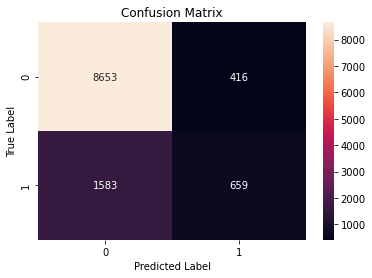

In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
pm=confusion_matrix(y_test, y_predict)
import seaborn as sns
df_lg= pd.DataFrame(pm)
sns.heatmap(df_lg, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 8653 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 659 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 416 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1583 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [56]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      9069
           1       0.61      0.29      0.40      2242

    accuracy                           0.82     11311
   macro avg       0.73      0.62      0.65     11311
weighted avg       0.80      0.82      0.80     11311



<b>Observation:</b>
<li>we got precision 0.80 and recall 0.82 that means that we got high recall, low precision this means that most of the positive examples are correctly recognized.</li>

In [57]:
from sklearn.model_selection import cross_val_score
mean_log=cross_val_score(log, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(log, X,y,cv=5,scoring="roc_auc").mean())
std_log= cross_val_score(log, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for logistic from mean AUC_ROC score is",cross_val_score(log, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8174517125445886
standard deviation for logistic from mean AUC_ROC score is 0.006098321558224234


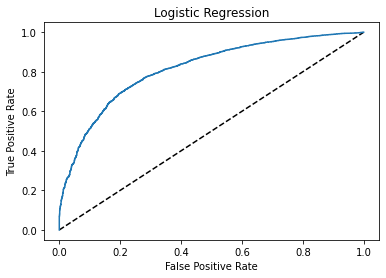

In [58]:
from sklearn.metrics import roc_curve
y_pred_prob= log.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)
# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [59]:
lg1=roc_auc_score(y_test, log.predict(X_test))
lg1

0.6240317197452103

<b>KNN (K-Nearest Neighbor)</b>

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
knn= GridSearchCV(knn, neighbors, cv=5,scoring="roc_auc")
knn.fit(X,y)
knn.best_params_

{'n_neighbors': 28}

In [61]:
knn=KNeighborsClassifier(n_neighbors=28)
auc_roc_score(knn,X,y)

Maximum AUC_ROC Score corresponding to: 62  and it is : 0.71


In [0]:
y_predict= knn.predict(X_test)
score_knn= knn.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((score_knn),3))

The accuracy of the KNN Model is: 0.848


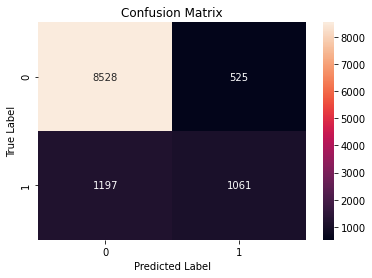

In [0]:
km=confusion_matrix(y_test, y_predict)
df_knn= pd.DataFrame(km)
sns.heatmap(df_knn, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 8528 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 1061 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 525 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1197 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [0]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9053
           1       0.67      0.47      0.55      2258

    accuracy                           0.85     11311
   macro avg       0.77      0.71      0.73     11311
weighted avg       0.84      0.85      0.84     11311



<b>Obervation:</b>
<li>we got precision 0.84 and recall 0.85 that means that we got high recall, high precision.</li>

In [0]:
from sklearn.model_selection import cross_val_score
mean_knn=cross_val_score(knn, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(knn, X,y,cv=5,scoring="roc_auc").mean())
std_knn= cross_val_score(knn, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for KNN from mean AUC_ROC score is",cross_val_score(knn, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8709555494153545
standard deviation for KNN from mean AUC_ROC score is 0.005063320149327651


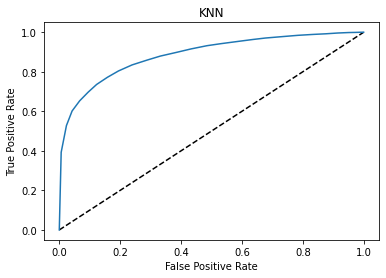

In [0]:
y_pred_prob= knn.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

In [0]:
acknn=roc_auc_score(y_test, knn.predict(X_test))
acknn

0.7059465139694528

<b>SVM(Support Vector Machine)</b>

In [0]:
from sklearn.svm import SVC
sv=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1]}
sv = GridSearchCV(sv, parameters, cv=5,scoring="roc_auc")
sv.fit(X,y)
sv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [0]:
sv=SVC(kernel="rbf",C=1,probability=True)
auc_roc_score(sv,X,y)

Maximum AUC_ROC Score corresponding to: 63  and it is : 0.69


In [0]:
sv_predict= sv.predict(X_test)
score_sv= sv.score(X_test, y_test)
print("The accuracy of the SVM Model is:",round((score_sv),3))

The accuracy of the SVM Model is: 0.845


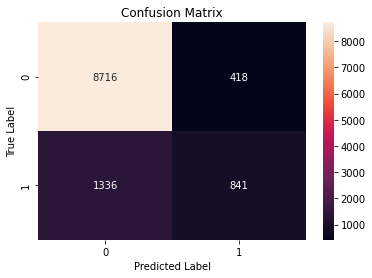

In [0]:
svm=confusion_matrix(y_test, sv_predict)
df_pm= pd.DataFrame(svm)
sns.heatmap(df_pm, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 8716 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 841 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 418 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1336 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [0]:
print(classification_report(y_test,sv_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9134
           1       0.67      0.39      0.49      2177

    accuracy                           0.84     11311
   macro avg       0.77      0.67      0.70     11311
weighted avg       0.83      0.84      0.83     11311



<b>Obervation:</b>
<li>we got precision 0.83 and recall 0.84 that means that we get high recall, low precision this means that most of the positive examples are correctly recognized.</li>

In [0]:
mean_sv=cross_val_score(sv, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(sv, X,y,cv=5,scoring="roc_auc").mean())
std_sv= cross_val_score(sv, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for SVM from mean AUC_ROC score is",cross_val_score(sv, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8613604042284748
standard deviation for SVM from mean AUC_ROC score is 0.0064262476741644686


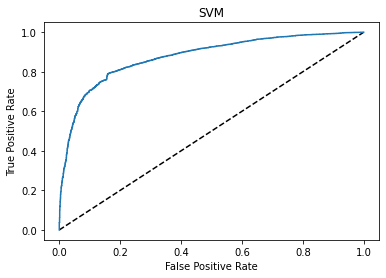

In [0]:
y_pred_prob= sv.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.show()

In [0]:
sv3=roc_auc_score(y_test, sv.predict(X_test))
sv3

0.6702741773858699

<b>Gradient Boosting Classifier</b>

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gc = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05], 'subsample': [0.1, 0.5,0.3], 'n_estimators': [10,50,100], 'max_depth': [2,4,8]}
gc= GridSearchCV(estimator=gc, param_grid= parameters, cv=5, n_jobs=-1)
gc.fit(X,y)
gc.best_params_

{'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [34]:
gc = GradientBoostingClassifier(learning_rate=0.03,max_depth=8,n_estimators=100,subsample=0.5)
auc_roc_score(gc,X,y)

Maximum AUC_ROC Score corresponding to: 62  and it is : 0.73


In [35]:
pred_gc= gc.predict(X_test)
score_gc= gc.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((score_gc),3))

The accuracy of the Grading Boosting Model is: 0.876


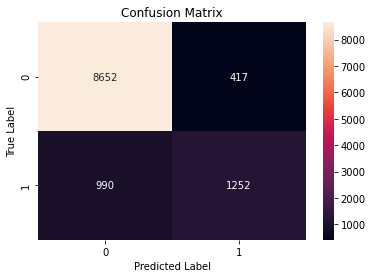

In [37]:
from sklearn.metrics import confusion_matrix
gcb=confusion_matrix(y_test, pred_gc)
df_pm= pd.DataFrame(gcb)
sns.heatmap(df_pm, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 8652  observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 1252 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 417 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 990 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [38]:
print(classification_report(y_test,pred_gc))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      9069
           1       0.75      0.56      0.64      2242

    accuracy                           0.88     11311
   macro avg       0.82      0.76      0.78     11311
weighted avg       0.87      0.88      0.87     11311



In [40]:
mean_gc=cross_val_score(gc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(gc, X,y,cv=5,scoring="roc_auc").mean())
std_gc= cross_val_score(gc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient Boosting from mean AUC_ROC score is",cross_val_score(gc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8948448185783352
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.00439629979332628


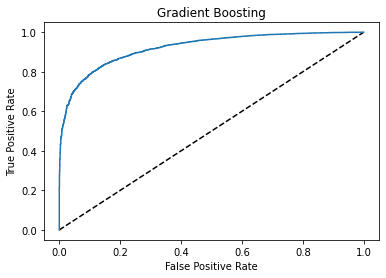

In [41]:
y_pred_prob= gc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [42]:
gca=roc_auc_score(y_test, gc.predict(X_test))
gca

0.7562245797385079

<b>XG Boost Classifier</b>

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier
xgc = XGBClassifier()
params={'min_child_weight': [1,5,7],'gamma': [0.5,1.5,2.5],"subsample":[0.4,0.8,1.0],"colsample_bytree":[0.6,0.8,1.0],'max_depth':[2,4,5]}
xgc= GridSearchCV(xgc, params, cv=5,scoring="roc_auc")
xgc.fit(X,y)
xgc.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1.0}

In [44]:
xgc = XGBClassifier(colsample_bytree=0.6,gamma=1.5,max_depth=5,min_child_weight=1,subsample=1.0)
auc_roc_score(xgc,X,y)

Maximum AUC_ROC Score corresponding to: 87  and it is : 0.74


In [45]:
pred_xg= xgc.predict(X_test)
score_xgc= xgc.score(X_test, y_test)
print("The accuracy of the XG Boost Model is:",round((score_xgc),3))

The accuracy of the XG Boost Model is: 0.864


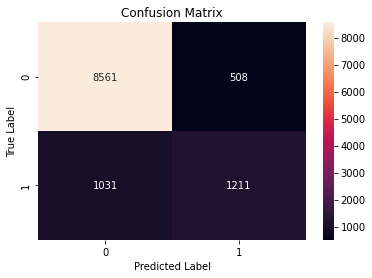

In [50]:
xgb=confusion_matrix(y_test, pred_xg)
df_xg= pd.DataFrame(xgb)
sns.heatmap(df_xg, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b>Observations:</b>
<li> There are 8561 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 1211 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 508 observation which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1031 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [46]:
print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      9069
           1       0.70      0.54      0.61      2242

    accuracy                           0.86     11311
   macro avg       0.80      0.74      0.76     11311
weighted avg       0.86      0.86      0.86     11311



In [47]:
mean_xg=cross_val_score(xgc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(xgc, X,y,cv=5,scoring="roc_auc").mean())
std_xg= cross_val_score(xgc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for XG Boost from mean AUC_ROC score is",cross_val_score(xgc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9016764778872469
standard deviation for XG Boost from mean AUC_ROC score is 0.004463305963291548


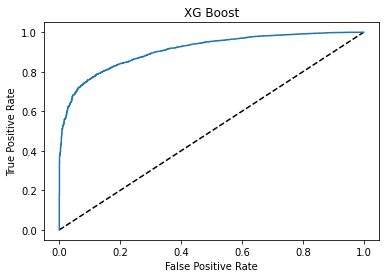

In [48]:
y_pred_prob= xgc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="XG")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XG Boost")
plt.show()

In [49]:
xg6=roc_auc_score(y_test, xgc.predict(X_test))
xg6

0.7420638667824604

# Evaluation:

In [4]:
#Lets initialise the data frame with columns model and f1_score
print("Model Comparsion")
models= [["Logistic Regression", 0.823,0.817451,0.006098],["KNN Classifier",0.848,0.870955,0.005063],["SVM Classifier",0.845,0.861360,0.006426],["Gradient Boosting Classifier",0.876,0.894844,0.004396],["XG Boost Classifier",0.864,0.901676,0.004463]]
comparsion_table= pd.DataFrame(models, columns=["Model Name", "Accuracy","Mean AUC Score"," Std from mean AUC Score"], index=[1,2,3,4,5])
comparsion_table

Model Comparsion


,Model Name,Accuracy,Mean AUC Score,Std from mean AUC Score
1,Logistic Regression,0.823,0.817451,0.006098
2,KNN Classifier,0.848,0.870955,0.005063
3,SVM Classifier,0.845,0.861360,0.006426
4,Gradient Boosting Classifier,0.876,0.894844,0.004396
5,XG Boost Classifier,0.864,0.901676,0.004463


<b>Observation:</b>
<li>As we are comparing the models, Gradient Boosting Classifier performed better with accuracy of 87.60%, Mean AUC Score of 0.894844 and Standard Deviation from Mean AUC Score of 0.004396.</li>

<h3><b>Conclusion:</b></h3>
<ol>
<li> This dataset is not balance i.e ~75% of the observations belongs to income group 0(Who earns less than (<=50K)) and ~25% of the observations belongs to income group 1(who earns more than (>50K).</li>
<li> Income group 1 who earns more than >50K have flexible working hours.</li>
<li> People having Masters, doctorate, prof-school are making more salary than 50K i.e.belongs to income group 1 (>50K).</li>
<li> People who are single and has done HS-grad are earning less than (<=50K).</li>
</ol>

<b> Saving the Prediction</b>

In [0]:
np.savetxt('Model11.csv',pred_gc,delimiter=',')

In [65]:
#Save the best Model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gc, 'Project12.pkl')

['Project12.pkl']